# CSV to JSON-LD via Morph

ref: https://github.com/morph-kgc/morph-kgc/tree/main/examples 

## Imports

In [1]:
import morph_kgc
import pandas as pd
import json
import pyoxigraph

## Demo

Uses the mapping.csv.yml

In [2]:
# the methods above also accept the config as a string
config = """
[GTFS_CSV]
mappings: mapping.csv.yml"""

g_rdflib = morph_kgc.materialize(config)

# work with the RDFLib graph
# g_rdflib = morph_kgc.materialize('./config.ini')  # or from file
# q_res = g_rdflib.query('SELECT DISTINCT ?classes WHERE { ?s a ?classes }')

# generate the triples and load them to Oxigraph
g_oxigraph = morph_kgc.materialize_oxigraph('./config.ini')
q_res = g_oxigraph.query('SELECT DISTINCT ?classes WHERE { ?s a ?classes }')

print(list(q_res))

INFO | 2024-05-16 16:24:49,436 | 86 mapping rules retrieved.
INFO | 2024-05-16 16:24:49,478 | Mapping partition with 83 groups generated.
INFO | 2024-05-16 16:24:49,478 | Maximum number of rules within mapping group: 2.
INFO | 2024-05-16 16:24:49,479 | Mappings processed in 0.957 seconds.
INFO | 2024-05-16 16:24:49,742 | Number of triples generated in total: 2001.
INFO | 2024-05-16 16:24:50,659 | 86 mapping rules retrieved.
INFO | 2024-05-16 16:24:50,695 | Mapping partition with 83 groups generated.
INFO | 2024-05-16 16:24:50,695 | Maximum number of rules within mapping group: 2.
INFO | 2024-05-16 16:24:50,696 | Mappings processed in 0.895 seconds.
INFO | 2024-05-16 16:24:50,956 | Number of triples generated in total: 2001.


[<QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Service>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Feed>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Route>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Agency>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Frequency>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Stop>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Trip>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#Shape>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#CalendarDateRule>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#CalendarRule>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#ShapePoint>>, <QuerySolution classes=<NamedNode value=http://vocab.gtfs.org/terms#StopTime>>]


In [3]:
__author__ = "Ioannis Dasoulas"
__credits__ = ["Julián Arenas-Guerrero","Ioannis Dasoulas"]

__license__ = "Apache-2.0"
__maintainer__ = "Ioannis Dasoulas"
__email__ = "ioannis.dasoulas@kuleuven.be"

users_df = pd.DataFrame({'Id': [1,2,3,4],\
                      'Username': ["@jude","@emily","@wayne","@jordan1"], \
                      'Name': ["Jude", "Emily", "Wayne", "Jordan"],\
                      'Surname': ["White", "Van de Beeck", "Peterson", "Stones"]})

followers_df = pd.DataFrame({'Id': [1,2,3,4],\
                      'Followers': [344, 456, 1221, 23]})

data_dict = {"variable1": users_df,
            "variable2": followers_df}

config = """
    [DataSource]
    mappings=./mapping.rml.ttl
"""

g_rdflib = morph_kgc.materialize(config, data_dict)

print("Knowledge graphs triples:")
for s,p,o in g_rdflib.triples((None, None, None)):
    print(s,p,o)


INFO | 2024-05-15 13:01:29,981 | 4 mapping rules retrieved.
INFO | 2024-05-15 13:01:29,988 | Mapping partition with 4 groups generated.
INFO | 2024-05-15 13:01:29,989 | Maximum number of rules within mapping group: 1.
INFO | 2024-05-15 13:01:29,989 | Mappings processed in 0.292 seconds.
INFO | 2024-05-15 13:01:30,175 | Number of triples generated in total: 16.


Knowledge graphs triples:
http://instagram.com/data/user4 http://instagram.com/data/followersNumber 23
http://instagram.com/data/user2 http://instagram.com/data/username @emily
http://instagram.com/data/user2 http://instagram.com/data/name Emily Van de Beeck
http://instagram.com/data/user2 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://instagram.com/data/User
http://instagram.com/data/user1 http://instagram.com/data/username @jude
http://instagram.com/data/user2 http://instagram.com/data/followersNumber 456
http://instagram.com/data/user1 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://instagram.com/data/User
http://instagram.com/data/user4 http://instagram.com/data/username @jordan1
http://instagram.com/data/user1 http://instagram.com/data/followersNumber 344
http://instagram.com/data/user3 http://instagram.com/data/username @wayne
http://instagram.com/data/user3 http://instagram.com/data/name Wayne Peterson
http://instagram.com/data/user3 http://instagram.com/data/foll

In [4]:
df = pd.read_csv("../inputs/GDSC_metadata.csv")

In [5]:
print(df.columns.values)

['ID' 'Title' 'Creator' 'Url' 'DOI' 'Publisher' 'Rights' 'License'
 'Restrictions' 'Coverage' 'Relations' 'Type' 'Date' 'Description'
 'Provenance' 'Subject' 'Language' 'Structure' 'Geometry' 'Bands'
 'Pixel Dimension' 'EPSG' 'Scale' 'Extent' 'Lineage' 'Process Step'
 'Processor' 'Point of Contact' 'Data Level' 'Label' 'Values' 'Attributes'
 'Color Ramp' 'Tile Zoom Levels' 'Collections' 'Analytic Function'
 'Analytic EPSG' 'Thumbnail' 'Service Definition' 'Sponsor' 'Status'
 'Rights Statement' 'Disclaimer' 'Service' 'Source' 'Parameters'
 'File Name' 'Extension' 'Download' 'Table Name' 'Format' 'Dependency'
 'Custom ETL' 'Custom Parameters' 'up' 'podID' 'Index Fields' 'Bash ETL'
 'SQL Transform' 'Last Updated' 'Update Frequency' 'Last Accessed'
 'Columns' 'ETL Documentation' 'Notes' 'TODO']


In [6]:
df.head(1)

,ID,Title,Creator,Url,DOI,Publisher,Rights,License,Restrictions,Coverage,...,Index Fields,Bash ETL,SQL Transform,Last Updated,Update Frequency,Last Accessed,Columns,ETL Documentation,Notes,TODO
0,1.0,Miami-Dade Home Owner's Loan Corporation (HOLC...,University of Richmond's Digital Scholarship Lab,https://services.arcgis.com/jIL9msH9OI208GCb/a...,NaN,University of Richmond's Digital Scholarship Lab,Public Domain,NaN,Use items owned by Esri in ArcGIS Online in co...,United States,...,--,TBD,TBD,2021-08-17,Never,--,OBJECTID|HOLC_grade|city|HOLC|Code|ST |CitySta...,Direct download as ESRI json from ESRI service...,NaN,update to reflect Miami only\ninclude other ci...


In [7]:
from pyvis.network import Network

net = Network(notebook=True)
net.add_nodes([1,2,3,4,5,6,7,8], label=['ID', 'Title', 'Creator', 'Url', 'DOI', 'Publisher', 'Rights', 'License'])


# net.add_nodes([3, 4, 5, 6], 
#               label=['Michael', 'Ben\n hasAFriend', 'Oliver', 'Olivia'],
#               color=['#3da831', '#9a31a8', '#3155a8', '#eb4034'])

net.add_edges([(1, 2)]) # title
net.add_edges([(1, 6)]) # title
net.add_edges([(1, 8)]) # title


net.show('nodes.html')

## Note

Could I do this as a JSON-LD document, we have found this somewhat logical for people.   Or something like a d2 in python

is what I have done in inspire or OIH book still the onl game out there?  sad




In [8]:
import jbutils

In [9]:
filename = "smallTemplate.json"  # Replace with your actual file name

# Open the file in read mode ('r')
with open(filename, 'r') as f:
  # Read the entire content into a string variable
  content = f.read()

# print(content)

In [10]:
jld = json.loads(content)

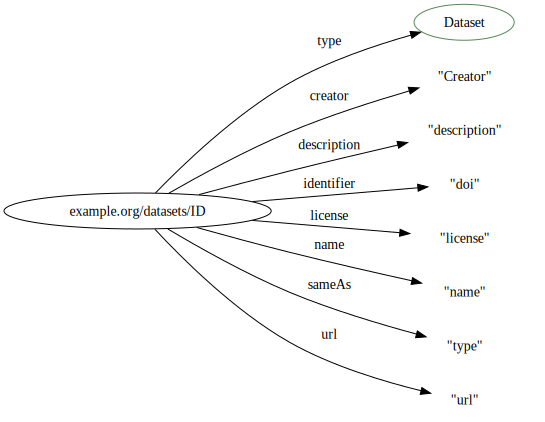

In [11]:
jbutils.show_graph(jld)

In [12]:
# convert to Turtle, being in turtle doesn't really help build the mapping
from rdflib import Graph

g = Graph()
g.parse(location="smallTemplate.json", format='json-ld')

#output file name and file format here

g.serialize(destination=r'./testbacktoturtle.ttl', format='turtle')

<Graph identifier=N9c52aafa65d84afcab0de5eaaf149db4 (<class 'rdflib.graph.Graph'>)>

In [17]:
df

,ID,Title,Creator,Url,DOI,Publisher,Rights,License,Restrictions,Coverage,...,Index Fields,Bash ETL,SQL Transform,Last Updated,Update Frequency,Last Accessed,Columns,ETL Documentation,Notes,TODO
0,1.0,Miami-Dade Home Owner's Loan Corporation (HOLC...,University of Richmond's Digital Scholarship Lab,https://services.arcgis.com/jIL9msH9OI208GCb/a...,NaN,University of Richmond's Digital Scholarship Lab,Public Domain,NaN,Use items owned by Esri in ArcGIS Online in co...,United States,...,--,TBD,TBD,2021-08-17,Never,--,OBJECTID|HOLC_grade|city|HOLC|Code|ST |CitySta...,Direct download as ESRI json from ESRI service...,NaN,update to reflect Miami only\ninclude other ci...
1,2.0,2019 Florida Census Tracts,Department of Commerce|U.S. Census Bureau|Geog...,https://www.census.gov/geographies/mapping-fil...,NaN,Department of Commerce|U.S. Census Bureau|Geog...,Public Domain,This Software was created by U.S. Government e...,NaN,United States|Florida,...,--,TBD,TBD,2021-09-22,Never,--,"STATEFP(string,2)|COUNTYFP(string,3)|TRACTCE(s...",ogr2ogr shapefile to postGIS,NaN,NaN
2,3.0,2019 Miami-Dade ACS 5 Year Estimates - Tract L...,Department of Commerce|U.S. Census Bureau,https://www.census.gov/data/developers/data-se...,NaN,Department of Commerce|U.S. Census Bureau,Public Domain,This Software was created by U.S. Government e...,NaN,United States|Florida,...,--,TBD,TBD,2021-06-02,Never,--,https://api.census.gov/data/2019/acs/acs5/vari...,The custom function acs_customgregate is given...,please use this as a template for all ACS esti...,NaN
3,4.0,2019 Florida ACS 5 Year Estimates - Tract Leve...,Department of Commerce|U.S. Census Bureau,https://www.census.gov/data/developers/data-se...,NaN,Department of Commerce|U.S. Census Bureau,Public Domain,This Software was created by U.S. Government e...,NaN,United States|Florida,...,--,TBD,TBD,2022-11-22,Never,--,https://api.census.gov/data/2019/acs/acs5/vari...,The custom function acs_customgregate is given...,update using 2019 DVMT ACS as model,NaN
4,5.0,2020 Florida Census Tracts - Florida,Department of Commerce|U.S. Census Bureau|Geog...,https://www.census.gov/geographies/mapping-fil...,NaN,Department of Commerce|U.S. Census Bureau|Geog...,Public Domain,This Software was created by U.S. Government e...,NaN,United States|Florida,...,--,TBD,TBD,2021-09-22,Never,--,"STATEFP(string,2)|COUNTYFP(string,3)|TRACTCE(s...",ogr2ogr shapefile to postGIS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1 = df.head(1)


In [14]:
df1.head()

,ID,Title,Creator,Url,DOI,Publisher,Rights,License,Restrictions,Coverage,...,Index Fields,Bash ETL,SQL Transform,Last Updated,Update Frequency,Last Accessed,Columns,ETL Documentation,Notes,TODO
0,1.0,Miami-Dade Home Owner's Loan Corporation (HOLC...,University of Richmond's Digital Scholarship Lab,https://services.arcgis.com/jIL9msH9OI208GCb/a...,NaN,University of Richmond's Digital Scholarship Lab,Public Domain,NaN,Use items owned by Esri in ArcGIS Online in co...,United States,...,--,TBD,TBD,2021-08-17,Never,--,OBJECTID|HOLC_grade|city|HOLC|Code|ST |CitySta...,Direct download as ESRI json from ESRI service...,NaN,update to reflect Miami only\ninclude other ci...


In [15]:
data_dict = {"variable1": df1}

config = """
    [DataSource]
    mappings=./florida.ttl
"""

g_rdflib = morph_kgc.materialize(config, data_dict)

print("Knowledge graphs triples:")
# for s,p,o in g_rdflib.triples((None, None, None)):
#     print(s,p,o)

ts = g_rdflib.serialize(format="json-ld")

print(ts)


INFO | 2024-05-15 13:01:32,066 | 6 mapping rules retrieved.
INFO | 2024-05-15 13:01:32,076 | Mapping partition with 6 groups generated.
INFO | 2024-05-15 13:01:32,077 | Maximum number of rules within mapping group: 1.
INFO | 2024-05-15 13:01:32,077 | Mappings processed in 0.366 seconds.
INFO | 2024-05-15 13:01:32,279 | Number of triples generated in total: 6.


Knowledge graphs triples:
[
  {
    "@id": "http://example.com/ns#1.0",
    "@type": [
      "https://schema.org/Dataset"
    ],
    "https://schema.org/geoSpatialCoverage": [
      {
        "@id": "_:bn1.0"
      }
    ],
    "https://schema.org/name": [
      {
        "@value": "Miami-Dade Home Owner's Loan Corporation (HOLC) Neighborhood Redlining Grade"
      }
    ],
    "https://schema.org/publisher": [
      {
        "@type": "http://www.w3.org/2000/01/rdf-schema#Literal",
        "@value": "University of Richmond's Digital Scholarship Lab Public Domain"
      }
    ]
  },
  {
    "@id": "_:bn1.0",
    "@type": [
      "https://schema.org/Place"
    ],
    "https://schema.org/geo": [
      {
        "@type": "http://www.w3.org/2000/01/rdf-schema#Literal",
        "@value": "United States"
      }
    ]
  }
]


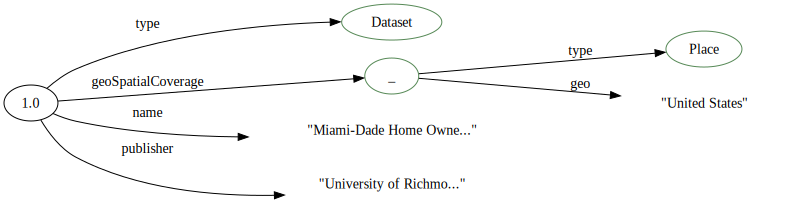

In [18]:
tsld = json.loads(ts)
jbutils.show_graph(tsld)